In [1]:
# description:
# this program attempt to predict the future price of a stock

In [4]:
# import the libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import yfinance as yf

In [12]:
# Collect and Clean the data
df=yf.download('AAPL',start='2020-01-01',end='2024-01-01')
df.columns = df.columns.droplevel(1)  # deleting multi-index 
df = df.reset_index() # turn date as a index to a column

df=df.dropna()
df

C:\Users\fardi\AppData\Local\Temp\ipykernel_6408\1147762826.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('AAPL',start='2020-01-01',end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
1,2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2,2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
3,2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
4,2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200
...,...,...,...,...,...,...
1001,2023-12-22,192.192551,193.989390,191.567126,193.761051,37149600
1002,2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300
1003,2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700
1004,2023-12-28,192.172699,193.244849,191.765676,192.728625,34049900


(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

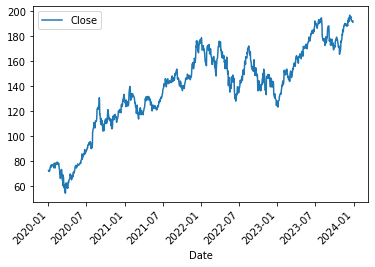

In [13]:
# show the data visually 
df.plot(x="Date",y="Close")
plt.xticks(rotation=45)

In [14]:
# create the model
model=RandomForestRegressor()

In [18]:
# train the model
X=df[['Open','High','Low','Volume']]
X=X[:int(len(df)-1)]
y=df['Close']
y=y[:int(len(df)-1)]

model.fit(X,y)

RandomForestRegressor()

In [19]:
# test the model 
predictions=model.predict(X)
print('The model score is ',model.score(X,y))

The model score is  0.9998059220326038


In [24]:
# make the prediction
new_data=df[['Open','High','Low','Volume']].tail(1)
prediction=model.predict(new_data)
print("the model predicts the last row to be: ",prediction)
print("Actual value is :",df[['Close']].tail(1).values)

the model predicts the last row to be:  [191.16466324]
Actual value is : [[191.13034058]]
